In [1]:
import warnings
warnings.filterwarnings('ignore')

In [76]:
#import osmnx as ox
import folium
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from catboost import CatBoostRegressor

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [43]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
features = pd.read_csv('features.csv')

In [5]:
x_train = train.drop(columns=['score'])
y_train = train['score']
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train)

**Катбуст на исходном трейне:**

In [6]:
rgs = CatBoostRegressor(verbose=False)
rgs.fit(x_train, y_train)
preds = rgs.predict(x_val)
mean_absolute_error(y_val, preds)


0.05755105711596548

**Визуализации трейна и признаков:**

In [35]:
def show_circles_on_map(data, latitude_column, longitude_column, color):
    location = (data[latitude_column].mean(), data[longitude_column].mean())
    m = folium.Map(location=location)

    for _, row in data.iterrows():
        folium.Circle(
            radius=10,
            location=(row[latitude_column], row[longitude_column]),
            color=color,
            fill_color=color,
            fill=True
        ).add_to(m)

    return m

In [36]:
show_circles_on_map(train, 'lat', 'lon', 'blue')

In [37]:
show_circles_on_map(features, 'lat', 'lon', 'blue')

In [48]:
dct = {i : np.nan for i in range(363)}
train = train.join(pd.DataFrame(dct, index=train.index))
train

id        lat        lon     score   0   1   2   3   4   5  ...  353  \
0        0  56.228300  43.945535  0.080523 NaN NaN NaN NaN NaN NaN  ...  NaN   
1        1  56.834244  53.141543  0.104424 NaN NaN NaN NaN NaN NaN  ...  NaN   
2        2  45.042299  41.990170  0.067615 NaN NaN NaN NaN NaN NaN  ...  NaN   
3        3  59.849408  30.387762  0.088038 NaN NaN NaN NaN NaN NaN  ...  NaN   
4        4  59.839643  30.304308  0.099686 NaN NaN NaN NaN NaN NaN  ...  NaN   
...    ...        ...        ...       ...  ..  ..  ..  ..  ..  ..  ...  ...   
3079  3079  55.674584  37.279505  0.531557 NaN NaN NaN NaN NaN NaN  ...  NaN   
3080  3080  55.784909  49.188791  0.101631 NaN NaN NaN NaN NaN NaN  ...  NaN   
3081  3081  55.118828  61.462996  0.125265 NaN NaN NaN NaN NaN NaN  ...  NaN   
3082  3082  55.649052  37.533877  0.322601 NaN NaN NaN NaN NaN NaN  ...  NaN   
3083  3083  56.317263  43.887981  0.137444 NaN NaN NaN NaN NaN NaN  ...  NaN   

      354  355  356  357  358  359  360  361  362  
0     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
1     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
3     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
4     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  
3079  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
3080  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
3081  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
3082  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
3083  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  

[3084 rows x 367 columns]

In [49]:
new_train = train.copy()
for i in range(train.shape[0]):
    for j in range(features.shape[0]):
        if str(train.loc[i,'lat'])[:6] == str(features.loc[j, 'lat'])[:6] or str(train.loc[i, 'lon'])[:6] == str(features.loc[j, 'lon'])[:6]:
            new_train.iloc[i, 4:] = features.iloc[j, 2:]
new_train

id        lat        lon     score         0         1         2  \
0        0  56.228300  43.945535  0.080523  0.142355  0.144008  0.201290   
1        1  56.834244  53.141543  0.104424  0.155809  0.185980  0.264994   
2        2  45.042299  41.990170  0.067615  0.123731  0.081694  0.288528   
3        3  59.849408  30.387762  0.088038  0.530317  0.485697  0.404958   
4        4  59.839643  30.304308  0.099686  0.439632  0.425653  0.368872   
...    ...        ...        ...       ...       ...       ...       ...   
3079  3079  55.674584  37.279505  0.531557  0.628328  0.508291  0.496949   
3080  3080  55.784909  49.188791  0.101631  0.193135  0.209952  0.328156   
3081  3081  55.118828  61.462996  0.125265  0.127627  0.114175  0.276783   
3082  3082  55.649052  37.533877  0.322601  0.716794  0.731568  0.576948   
3083  3083  56.317263  43.887981  0.137444  0.102848  0.049478  0.322905   

             3         4         5  ...       353       354       355  \
0     0.145479  0.124842  0.135348  ...  0.040666  0.046229  0.043170   
1     0.141179  0.141510  0.144426  ...  0.065481  0.071528  0.189001   
2     0.147063  0.129450  0.107415  ...  0.040277  0.054266  0.098834   
3     0.560523  0.504663  0.527257  ...  0.045273  0.055102  0.119507   
4     0.489872  0.389968  0.428121  ...  0.037683  0.046643  0.048304   
...        ...       ...       ...  ...       ...       ...       ...   
3079  0.788273  0.614644  0.594181  ...  0.053256  0.075838  0.116024   
3080  0.184800  0.167313  0.190666  ...  0.040777  0.051746  0.052035   
3081  0.137704  0.127110  0.109568  ...  0.059907  0.063839  0.124747   
3082  0.790481  0.626154  0.699200  ...  0.051086  0.051255  0.094481   
3083  0.132717  0.111828  0.075142  ...  0.033209  0.046360  0.105107   

           356       357       358       359       360       361       362  
0     0.037397  0.006636  0.006988  0.042022  0.046229  0.030355  0.028775  
1     0.151894  0.099540  0.049259  0.192959  0.185524  0.324322  0.345749  
2     0.107362  0.017741  0.007500  0.068727  0.064803  0.137159  0.125284  
3     0.108795  0.023158  0.008352  0.046622  0.055102  0.084029  0.083712  
4     0.046775  0.013543  0.009374  0.039043  0.046643  0.033964  0.035991  
...        ...       ...       ...       ...       ...       ...       ...  
3079  0.094795  0.008803  0.004943  0.054594  0.075838  0.081581  0.072940  
3080  0.045472  0.010157  0.006988  0.042133  0.051746  0.036588  0.034988  
3081  0.113721  0.020585  0.005284  0.061235  0.063839  0.087714  0.087502  
3082  0.126189  0.009615  0.003920  0.052427  0.051255  0.066433  0.097095  
3083  0.107884  0.005553  0.002557  0.034576  0.046360  0.073904  0.083011  

[3084 rows x 367 columns]

In [68]:
new_train = new_train.dropna()

**Качество на всех новых признаках:**

In [69]:
x_train = new_train.drop(columns=['score'])
y_train = new_train['score']
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.3)
rgs.fit(x_train, y_train)
preds = rgs.predict(x_val)
mean_absolute_error(y_val, preds)

0.0699295747537905

**Качество на исходном трейне**

In [71]:
x_train = train.drop(columns=['score'])
y_train = train['score']
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.3)
rgs.fit(x_train, y_train)
preds = rgs.predict(x_val)
mean_absolute_error(y_val, preds)

0.05338632790051374

**График зависимости ошибки на валидации от количества отбираемых признаков:**

Learning rate set to 0.048917
Step #1 out of 1
Feature #3 eliminated
Feature #4 eliminated
Feature #5 eliminated
Feature #6 eliminated
Feature #7 eliminated
Feature #8 eliminated
Feature #9 eliminated
Feature #10 eliminated
Feature #11 eliminated
Feature #12 eliminated
Feature #13 eliminated
Feature #14 eliminated
Feature #15 eliminated
Feature #16 eliminated
Feature #17 eliminated
Feature #18 eliminated
Feature #19 eliminated
Feature #20 eliminated
Feature #21 eliminated
Feature #22 eliminated
Feature #23 eliminated
Feature #24 eliminated
Feature #25 eliminated
Feature #26 eliminated
Feature #27 eliminated
Feature #28 eliminated
Feature #29 eliminated
Feature #30 eliminated
Feature #31 eliminated
Feature #32 eliminated
Feature #33 eliminated
Feature #34 eliminated
Feature #35 eliminated
Feature #36 eliminated
Feature #37 eliminated
Feature #38 eliminated
Feature #39 eliminated
Feature #40 eliminated
Feature #41 eliminated
Feature #42 eliminated
Feature #43 eliminated
Feature #44 elimi

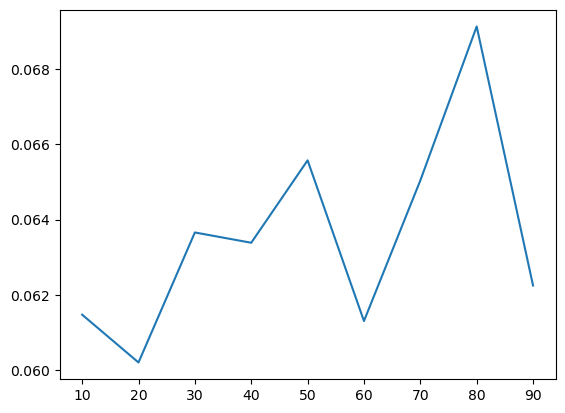

In [79]:
err = []
for n in range(10, 100, 10):
    x_train = train.drop(columns=['score'])
    y_train = train['score']
    new_feat = rgs.select_features(x_train, 
                        y_train, 
                        features_for_select=['0-362'], 
                        num_features_to_select=n, 
                        verbose=False,
                        train_final_model=False)['selected_features']
    x_train = new_train.iloc[:, new_feat]
    y_train = new_train['score']
    x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.3)
    rgs.fit(x_train, y_train)
    preds = rgs.predict(x_val)
    err.append(mean_absolute_error(y_val, preds))
plt.plot(list(range(10, 100, 10)), err)

**Качество с лучшим количеством отбираемых признаков (по графику):**

In [80]:
x_train = train.drop(columns=['score'])
y_train = train['score']
new_feat = rgs.select_features(x_train, 
                    y_train, 
                    features_for_select=['0-362'], 
                    num_features_to_select=20, 
                    verbose=False,
                    train_final_model=False)['selected_features']
x_train = new_train.iloc[:, new_feat]
y_train = new_train['score']
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.3)
rgs.fit(x_train, y_train)
preds = rgs.predict(x_val)
mean_absolute_error(y_val, preds)

Learning rate set to 0.048917
Step #1 out of 1
Feature #3 eliminated
Feature #4 eliminated
Feature #5 eliminated
Feature #6 eliminated
Feature #7 eliminated
Feature #8 eliminated
Feature #9 eliminated
Feature #10 eliminated
Feature #11 eliminated
Feature #12 eliminated
Feature #13 eliminated
Feature #14 eliminated
Feature #15 eliminated
Feature #16 eliminated
Feature #17 eliminated
Feature #18 eliminated
Feature #19 eliminated
Feature #20 eliminated
Feature #21 eliminated
Feature #22 eliminated
Feature #23 eliminated
Feature #24 eliminated
Feature #25 eliminated
Feature #26 eliminated
Feature #27 eliminated
Feature #28 eliminated
Feature #29 eliminated
Feature #30 eliminated
Feature #31 eliminated
Feature #32 eliminated
Feature #33 eliminated
Feature #34 eliminated
Feature #35 eliminated
Feature #36 eliminated
Feature #37 eliminated
Feature #38 eliminated
Feature #39 eliminated
Feature #40 eliminated
Feature #41 eliminated
Feature #42 eliminated
Feature #43 eliminated
Feature #44 elimi

0.06582940917076531

**Качество с понижением размерности (50 компонент):**

In [70]:
new_train.columns = new_train.columns.astype(str)
x_train = new_train.drop(columns=['score'])
y_train = new_train['score']
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.3)
pca = PCA(n_components=50)
x_train = pca.fit_transform(x_train)
x_val = pca.transform(x_val)
rgs.fit(x_train, y_train)
preds = rgs.predict(x_val)
mean_absolute_error(y_val, preds)

0.06948921385434785